In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys

sys.path.append('../src/')

%load_ext autoreload
%autoreload 2

from iterative_geometry_solver import iterative_geometry_solver

The data below was generated using 'MC_star_baseline.py'.

In [2]:
num_terminals_arr = np.array([10, 20,30, 50,70, 100,150,200])
mean_full_arr = np.zeros(len(num_terminals_arr))
mean_conv_arr = np.zeros(len(num_terminals_arr))
std_full_arr = np.zeros(len(num_terminals_arr))
std_conv_arr = np.zeros(len(num_terminals_arr))
mean_conv_low = np.zeros(len(num_terminals_arr))
std_conv_low = np.zeros(len(num_terminals_arr))
mean_conv_high = np.zeros(len(num_terminals_arr))
std_conv_high = np.zeros(len(num_terminals_arr))

for i,num_terminals in enumerate(num_terminals_arr):
    
    #load data:
    pkl_file_path = f"../results/output_files/topo_optimization/MC_star_probs150_size{num_terminals}_new.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    large_results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    iter_till_full_arr = np.array([])
    iter_conv_arr = np.array([])
    iter_conv_arr_low = np.array([])
    iter_conv_arr_high = np.array([])
    
    for thread_dict in large_results_dict:
        for key in thread_dict:
            iter_till_full_arr = np.append(iter_till_full_arr, thread_dict[key]['iter_till_full_tree'])
            iter_conv_arr = np.append(iter_conv_arr, thread_dict[key]['iter_till_converged'])  
            
            if thread_dict[key]["bot_problem_dict"]["al"] <= 0.5:
                iter_conv_arr_low = np.append(iter_conv_arr_low, thread_dict[key]['iter_till_converged'])
            else:
                iter_conv_arr_high = np.append(iter_conv_arr_high, thread_dict[key]['iter_till_converged'])
            
            
    mean_full_arr[i] = np.mean(iter_till_full_arr)
    std_full_arr[i] = np.std(iter_till_full_arr) 
    mean_conv_arr[i] = np.mean(iter_conv_arr)
    std_conv_arr[i] = np.std(iter_conv_arr)    
    
    mean_conv_low[i] = np.mean(iter_conv_arr_low)
    std_conv_low[i] = np.std(iter_conv_arr_low)
    mean_conv_high[i] = np.mean(iter_conv_arr_high)
    std_conv_high[i] = np.std(iter_conv_arr_high)

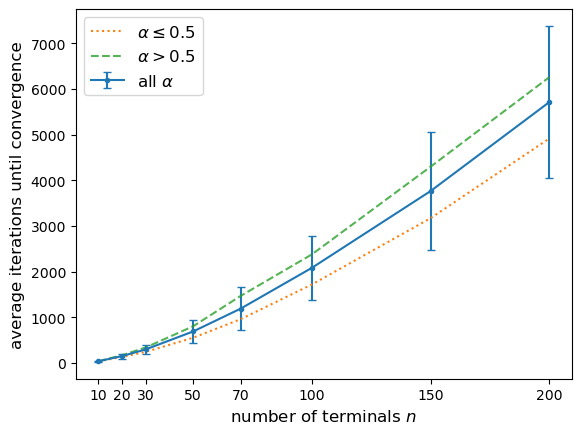

In [3]:
plt.errorbar(num_terminals_arr, mean_conv_arr, yerr=std_conv_arr, fmt=".-", capsize=3, label="all $\\alpha$")
#plt.errorbar(num_terminals_arr, mean_conv_low, yerr=std_conv_low, fmt=".-", capsize=3, label="low alpha")
#plt.errorbar(num_terminals_arr, mean_conv_high, yerr=std_conv_high, fmt=".-", capsize=3, label="high alpha")

plt.plot(num_terminals_arr, mean_conv_low, ":", label="$\\alpha \\leq 0.5$")
plt.plot(num_terminals_arr, mean_conv_high, "--", label="$\\alpha > 0.5$", alpha = 0.8)


#plt.errorbar(num_terminals_arr, mean_full_arr, yerr=std_full_arr, fmt=".-", capsize=3, label="iterations till full tree")
plt.legend(fontsize= 12)
plt.ylabel("average iterations until convergence", fontsize= 12)
plt.xlabel("number of terminals $n$", fontsize= 12)
plt.xticks(num_terminals_arr)
#plt.savefig("iter_conv.pdf", bbox_inches="tight")
plt.show()

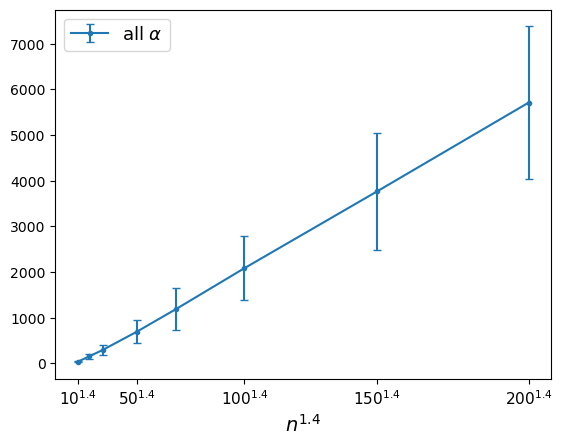

In [4]:
exp = 1.4
ticks_str = []
for num_terminals in np.array([10,50,100,150,200]):
    ticks_str.append(f"${num_terminals}^" + "{1.4}$")

plt.errorbar(num_terminals_arr**exp, mean_conv_arr, yerr=std_conv_arr, fmt=".-", capsize=3, label="all $\\alpha$")
#plt.errorbar(num_terminals_arr, mean_conv_low, yerr=std_conv_low, fmt=".-", capsize=3, label="low alpha")
#plt.errorbar(num_terminals_arr, mean_conv_high, yerr=std_conv_high, fmt=".-", capsize=3, label="high alpha")

#plt.plot(num_terminals_arr**exp, mean_conv_low, ":", label="$\\alpha \\leq 0.5$")
#plt.plot(num_terminals_arr**exp, mean_conv_high, "--", label="$\\alpha > 0.5$", alpha = 0.8)


#plt.errorbar(num_terminals_arr, mean_full_arr, yerr=std_full_arr, fmt=".-", capsize=3, label="iterations till full tree")
plt.legend(fontsize = 13)
#plt.ylabel("average iterations till convergence", fontsize = 13)
plt.xlabel("$n^{1.4}$", fontsize = 14)
plt.xticks(np.array([10,50,100,150,200])**exp, ticks_str, fontsize=11)
#plt.savefig("iter_conv15.pdf", bbox_inches="tight")
plt.show()

### Analyse the alpha-dependence:

For each problem, subtract the number of iterations from the mean. And add the difference to an array depending on the value of alpha. Seperate the alpha interval into 20 segments.

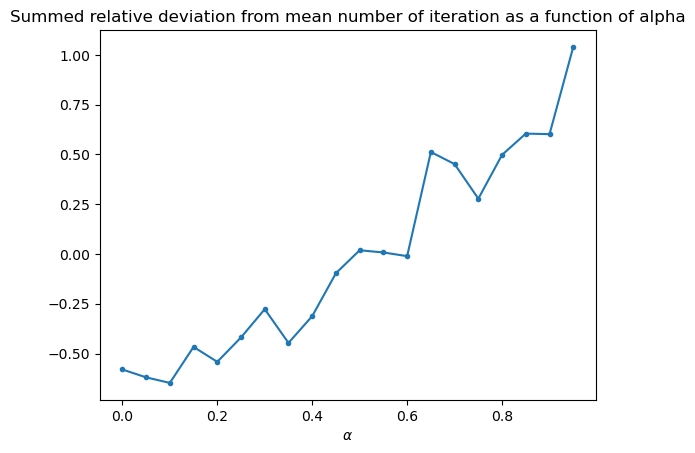

In [5]:
num_segments = 20

convergence_per_seg = np.zeros(num_segments)
problems_per_seg = np.zeros(num_segments)

for i,num_terminals in enumerate(num_terminals_arr):
    
    #load data:
    pkl_file_path = f"../results/output_files/topo_optimization/MC_star_probs150_size{num_terminals}_new.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    large_results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    for thread_dict in large_results_dict:
        for key in thread_dict:
            iter_conv = thread_dict[key]['iter_till_converged']
            al = thread_dict[key]["bot_problem_dict"]["al"]
            
            segment = int(al * num_segments)
            problems_per_seg[segment] += 1
            convergence_per_seg[segment] += (iter_conv - mean_conv_arr[i])/std_conv_arr[i]
            
plt.title("Summed relative deviation from mean number of iteration as a function of alpha")
plt.plot(np.arange(num_segments)/num_segments, convergence_per_seg/problems_per_seg, ".-")
plt.xlabel("$\\alpha$")
plt.show()

### Look at a few example runs

al = 0.8181211503680234 num_terminals= 10


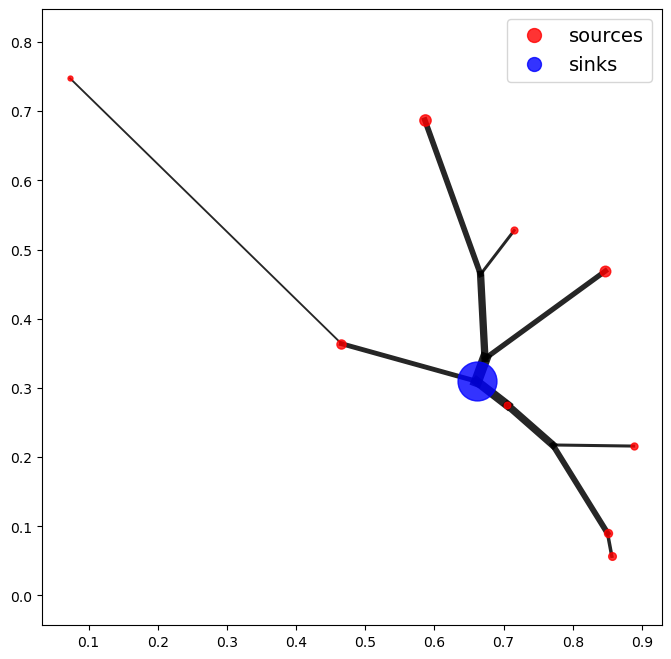

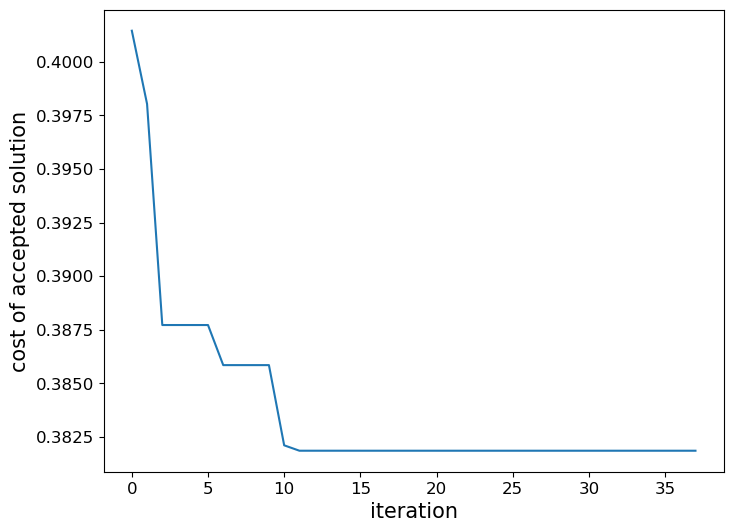

al = 0.18523802402416079 num_terminals= 20


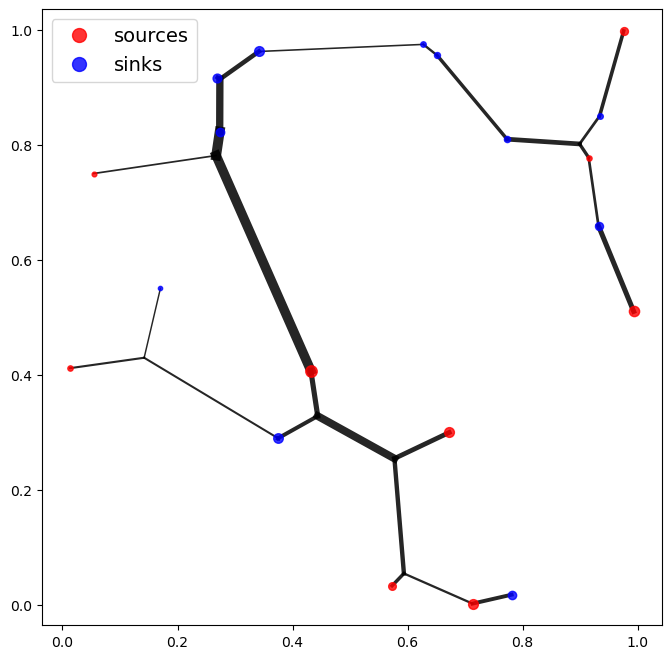

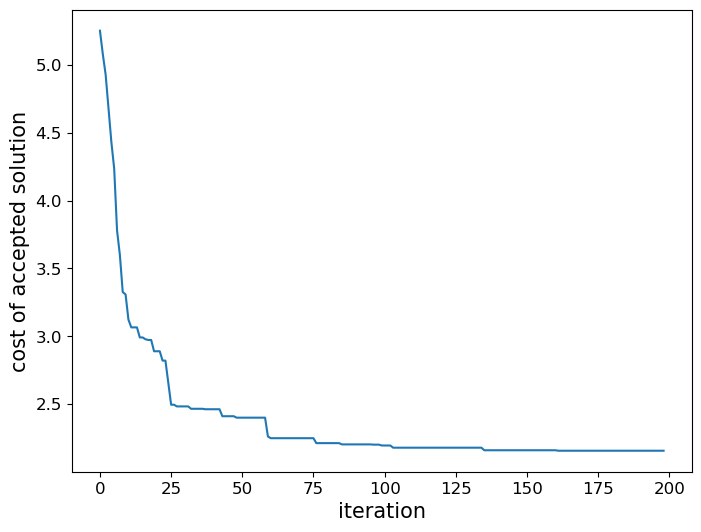

al = 0.7675767014856414 num_terminals= 30


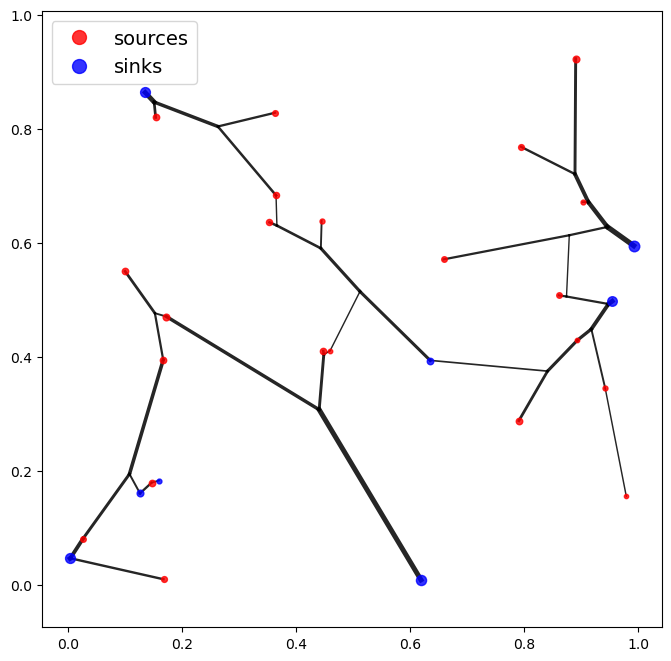

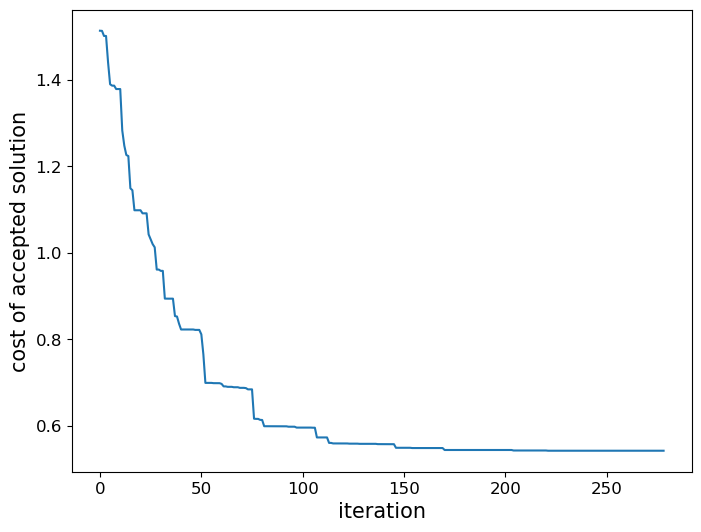

al = 0.7868864759056357 num_terminals= 50


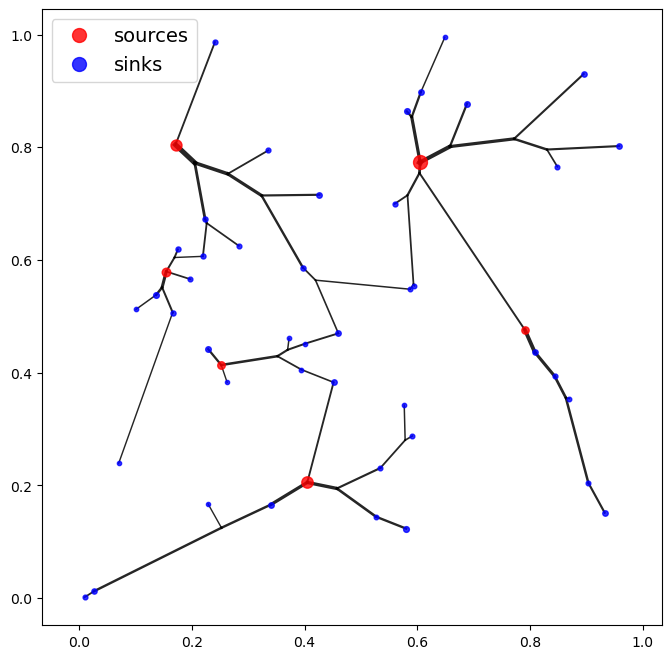

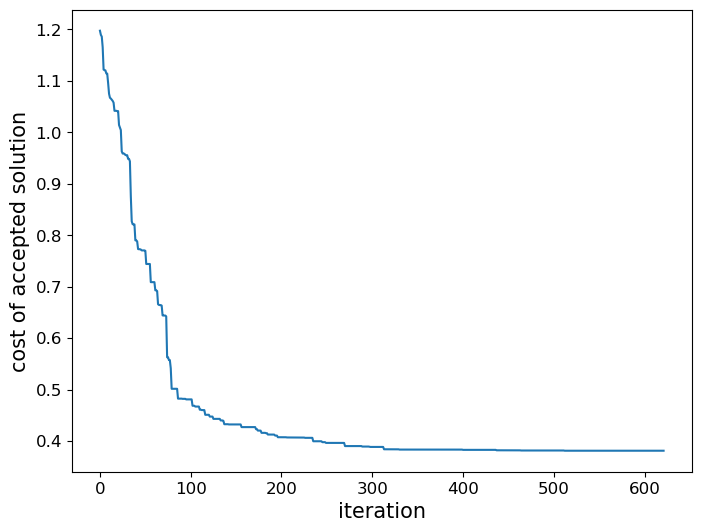

al = 0.27320599611903607 num_terminals= 70


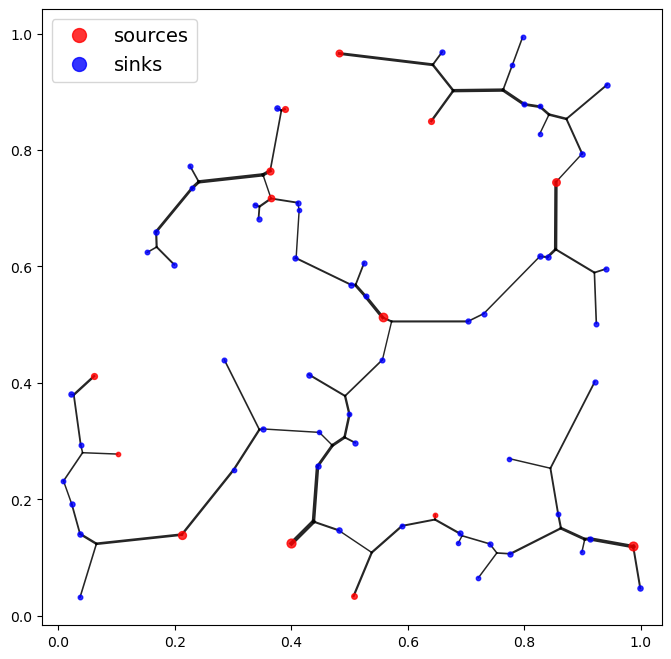

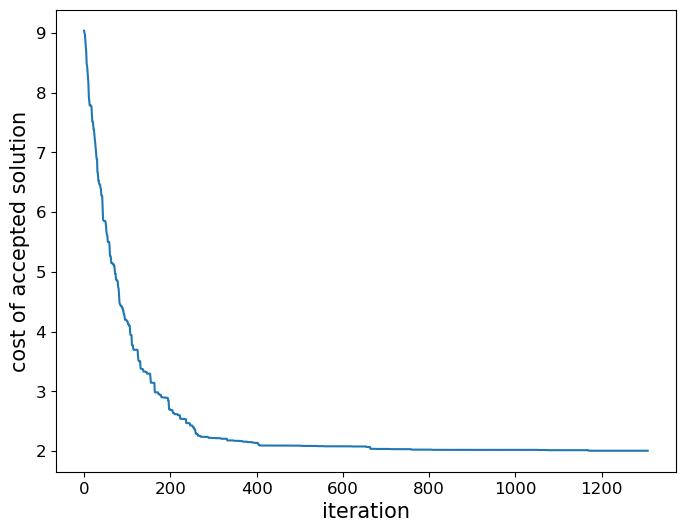

al = 0.6051269092817325 num_terminals= 100


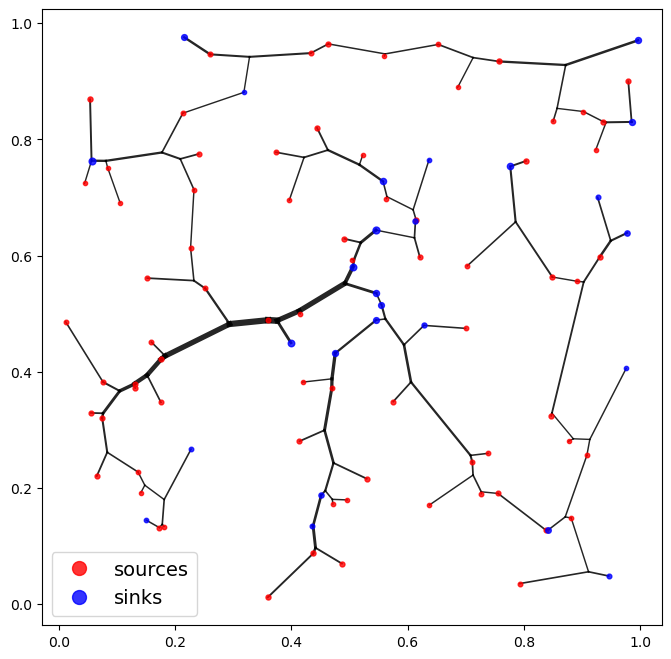

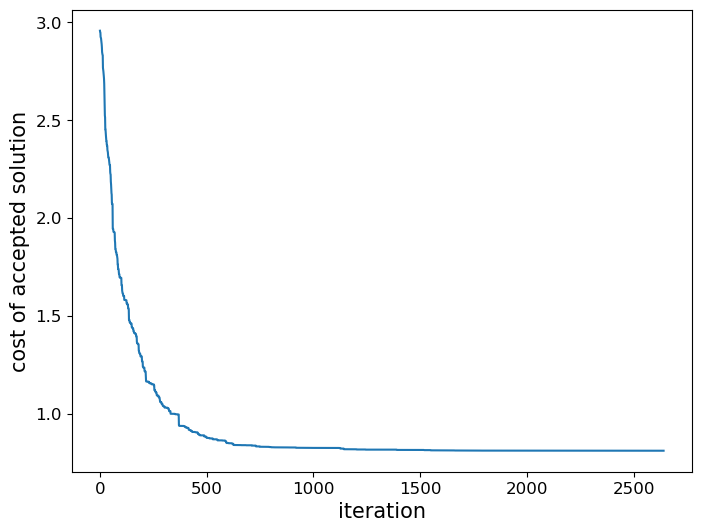

al = 0.06197514218342004 num_terminals= 150


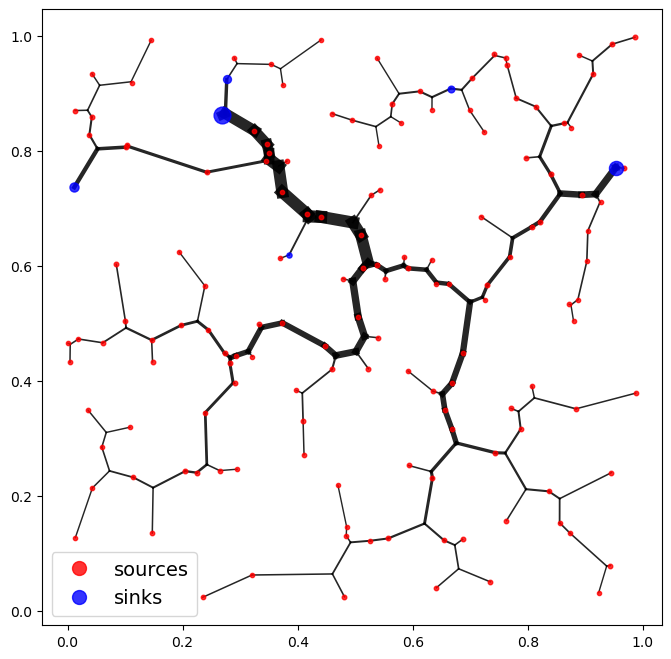

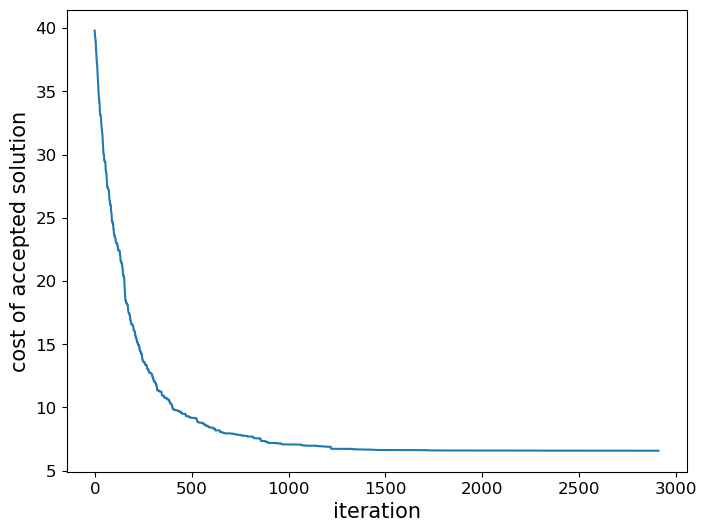

al = 0.7292800905742304 num_terminals= 200


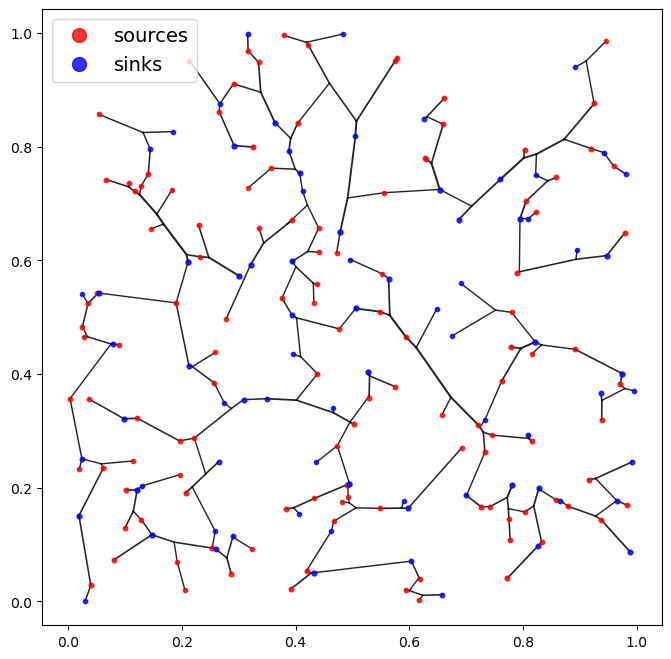

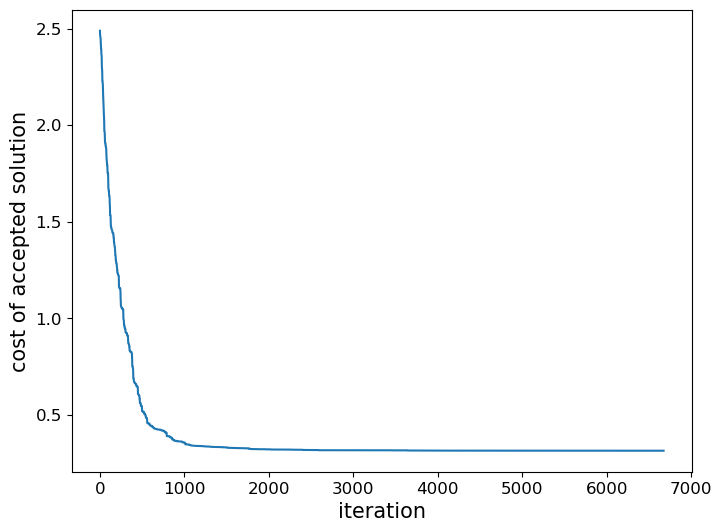

In [8]:
#check if the convergence criterion is okay and visually check the solutions:
np.random.seed(5438)
for i,num_terminals in enumerate(num_terminals_arr):
    
    #load data:
    pkl_file_path = f"../results/output_files/topo_optimization/MC_star_probs150_size{num_terminals}_new.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    large_results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    thread_dict = large_results_dict[3]
    random_key = np.random.randint(len(thread_dict))
    
    # show solutions:
    bot_problem_dict = thread_dict[random_key]['bot_problem_dict']
    al = bot_problem_dict["al"]
    coords_sources = bot_problem_dict["coords_sources"]
    coords_sinks = bot_problem_dict["coords_sinks"]
    supply_arr = bot_problem_dict["supply_arr"]
    demand_arr = bot_problem_dict["demand_arr"]
    print("\nal =",al, "num_terminals=", num_terminals)
    MC_topo = thread_dict[random_key]["final_topo"]
    
    cost, coords_iter = iterative_geometry_solver(MC_topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                        relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=1000,
                                        plot=True, title="", fov=None, save=False, save_name=f"img_{num_terminals}")
    
    # print cost_arr:
    cost_arr = thread_dict[random_key]['cost_arr']
    iter_conv = thread_dict[random_key]['iter_till_converged']
    
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(len(cost_arr)), cost_arr)
    plt.xlabel("iteration",fontsize = 15)
    plt.ylabel("cost of accepted solution",fontsize = 15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig(f"sim-ann_{num_terminals}.pdf")
    plt.show()